<a href="https://colab.research.google.com/github/stacykeago/Nairobi-Hospital-data-to-determine-whether-a-patient-has-hypothyroid/blob/main/Nairobi_Hospital_hypothyroidism_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

# Define the question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


# Load the data

In [ ]:
# load the data
# preview the data
data = pd.read_csv('/content/hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## Check for data types

In [ ]:

# check for the data types
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

### Convert data types to numerical values

In [ ]:
data[["TSH","T3","TT4","T4U","FTI"]] = data [["TSH","T3","TT4","T4U","FTI"]].apply(pd.to_numeric, errors='coerce')


## Data description

In [ ]:
data.describe()

,TSH,T3,TT4,T4U,FTI
count,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,5.923180,1.939749,108.850000,0.978199,115.397771
std,23.899467,0.996773,45.485419,0.226580,60.239572
min,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,1.400000,83.000000,0.850000,91.000000
50%,0.700000,1.800000,104.000000,0.960000,107.000000
75%,2.300000,2.300000,128.000000,1.065000,129.000000
max,530.000000,10.200000,450.000000,2.210000,881.000000


#### Convert status column to category then interger

In [ ]:
# Convert the data type for 'status' column from object to category
data['status'] = data['status'].astype('category')
status =data['status'].cat.codes
status


0       0
1       0
2       0
3       0
4       0
       ..
3158    1
3159    1
3160    1
3161    1
3162    1
Length: 3163, dtype: int8

In [ ]:
data['on_thyroxine'] = data['on_thyroxine'].astype('category')
on_thyroxine =data['on_thyroxine'].cat.codes
on_thyroxine

0       0
1       1
2       0
3       0
4       0
       ..
3158    0
3159    0
3160    0
3161    0
3162    1
Length: 3163, dtype: int8

## Check for null values

In [ ]:
data.isnull().sum()

status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
TBG                            0
dtype: int64

## Replace Null values with median

In [ ]:
#Dealing with null values
#Filling the null values in "TSH","T3","TT4","T4U","FTI" with the median values:
data['TSH'].fillna((data['TSH'].median()), inplace= True)
data['T3'].fillna((data['T3'].median()), inplace= True)
data['TT4'].fillna((data['TT4'].median()), inplace= True)
data['FTI'].fillna((data['FTI'].median()), inplace= True)
data['T4U'].fillna((data['T4U'].median()), inplace= True)

In [ ]:
# checking for any more null
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## Check for anormalies

In [ ]:
#check for anomalies
for i in data.columns:
  print(data[i].unique())
  print('\n')

['hypothyroid', 'negative']
Categories (2, object): ['hypothyroid', 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f', 't']
Categories (2, object): ['f', 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+01
 5.30e+01 9.40e+00 1.26e+02 1.00e+01

## Check for duplicates

In [ ]:
# Checking for duplicates:
data.duplicated().sum()

77

## Check for outliers

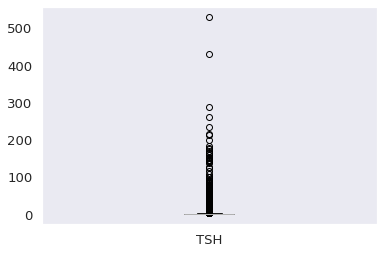

In [ ]:
# Check for outliers
data.boxplot(column =['TSH'], grid = False)


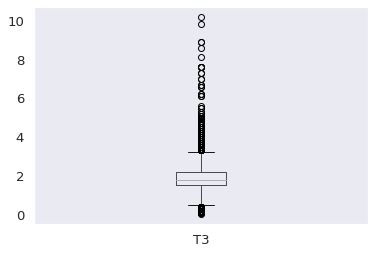

In [ ]:
data.boxplot(column =['T3'], grid = False)


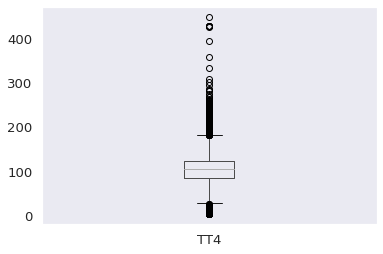

In [ ]:
data.boxplot(column =['TT4'], grid = False)


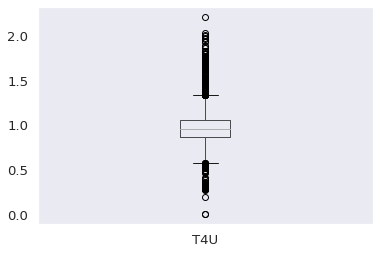

In [ ]:
data.boxplot(column =['T4U'], grid = False)


# SVM

### Split target and feature

In [ ]:
#split target and feature sets
X = data.drop('status',axis=1).values
y= data['status'].values

In [ ]:
#  Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
#import SVM where Kernel = 'rbf'
from sklearn.svm import SVC
rbf_c = SVC(kernel='rbf',gamma='auto')


In [ ]:
#fit train model
rnd_clf = RandomForestClassifier(
             n_estimators=120,
             criterion='gini',
             max_features= None,
             max_depth = 14 )

rnd_clf.fit(X_train, y_train)
rbf_c.fit(X_train,y_train)
#predict
y_Pred = rbf_c.predict(X_test)

NameError: ignored

## plotting test results against presence of hypothyroidsm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


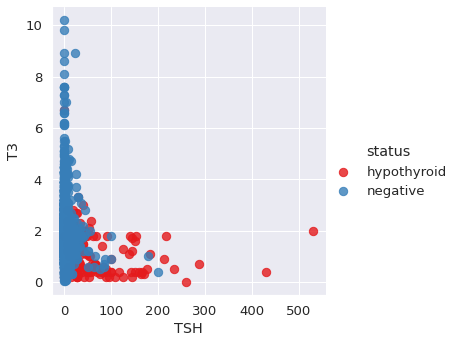

In [ ]:
# Plotting our desired features
# Testing likelihood of hypothyroidsm against various symptoms

sns.lmplot("TSH","T3", data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

-less TSH and high T3 is likely to be Negative hypothyroid

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


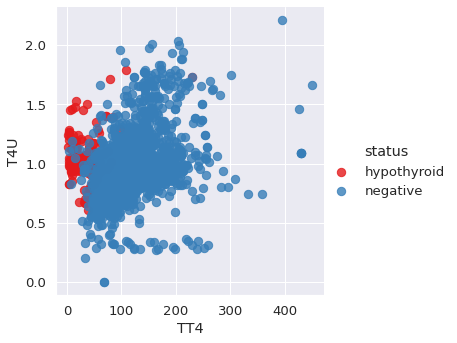

In [ ]:
# Testing TT4 $ T4U against hypothyroidsm
sns.lmplot("TT4","T4U", data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [ ]:
# Specify the input for the model
tests = data[['TSH', 'T3']].values



In [ ]:
# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(tests,status)

# Decision tree

## Check the dependent variable

In [ ]:
#dcheck the dependent variable
data['status'].value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidsm so let's use that column as our Y
y = data['status'].values


In [ ]:
test_features = ["TSH","T3","TT4","T4U","FTI"]
# We should be able to use nearly all the other features,
#but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values



In [ ]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



TypeError: ignored

In [ ]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

In [ ]:
# Train it on our training set.
tree = tree.fit(x_train, y_train)


### Import new libraries

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [ ]:
pip install --upgrade scikit-learn==0.20.3

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=["TSH","T3","TT4","T4U","FTI"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('data.png')
Image(graph.create_png())

NotFittedError: ignored